In [2]:
import pandas as pd
import numpy as np

In [35]:
data=pd.read_csv('aiif_eikon_eod_data.csv',parse_dates=True)
data=pd.DataFrame(data[['Date','XAU=']])
data.head()

,Date,XAU=
0,2010-01-01,1096.35
1,2010-01-04,1120.00
2,2010-01-05,1118.65
3,2010-01-06,1138.50
4,2010-01-07,1131.90


In [36]:
data.rename(columns={'XAU=':'price'},inplace=True)
data.head()

,Date,price
0,2010-01-01,1096.35
1,2010-01-04,1120.00
2,2010-01-05,1118.65
3,2010-01-06,1138.50
4,2010-01-07,1131.90


<AxesSubplot:title={'center':'Gold price'}>

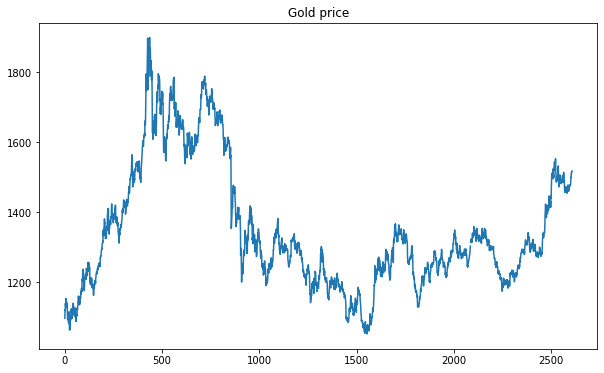

In [39]:
data.price.plot(figsize=(10,6),title="Gold price")

In [40]:
data['returns']=np.log(data['price']/data['price'].shift(1))
data.head()

,Date,price,returns
0,2010-01-01,1096.35,NaN
1,2010-01-04,1120.00,0.021342
2,2010-01-05,1118.65,-0.001206
3,2010-01-06,1138.50,0.017589
4,2010-01-07,1131.90,-0.005814


In [41]:
data['position']=np.sign(data['returns'])
data.head()

,Date,price,returns,position
0,2010-01-01,1096.35,NaN,NaN
1,2010-01-04,1120.00,0.021342,1.0
2,2010-01-05,1118.65,-0.001206,-1.0
3,2010-01-06,1138.50,0.017589,1.0
4,2010-01-07,1131.90,-0.005814,-1.0


In [42]:
data['strategy']=data['position'].shift(1)*data['returns']

<AxesSubplot:>

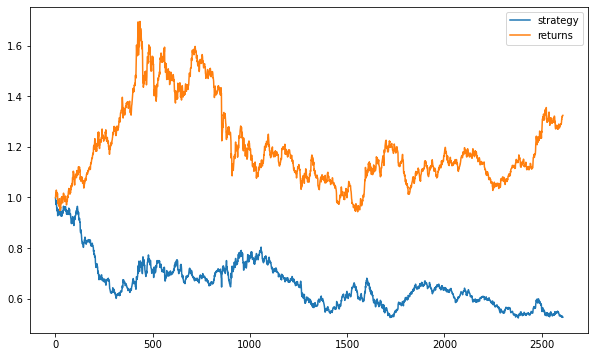

In [43]:
data[['strategy','returns']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))

In [46]:
data['position']=np.sign(data['returns'].rolling(3).mean())
data['strategy']=data['position'].shift(1)*data['returns']

In [47]:
data.head()

,Date,price,returns,position,strategy
0,2010-01-01,1096.35,NaN,NaN,NaN
1,2010-01-04,1120.00,0.021342,NaN,NaN
2,2010-01-05,1118.65,-0.001206,NaN,NaN
3,2010-01-06,1138.50,0.017589,1.0,NaN
4,2010-01-07,1131.90,-0.005814,1.0,-0.005814


<AxesSubplot:title={'center':'Momentum of the last three returns'}>

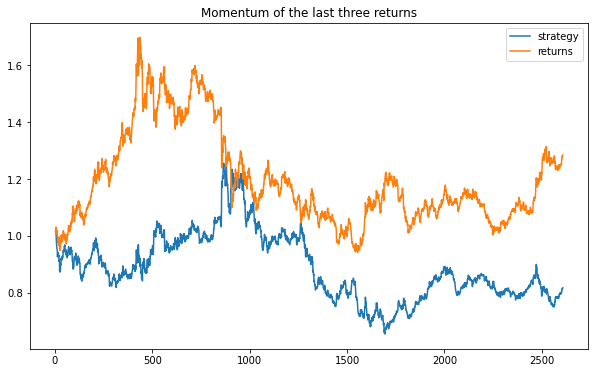

In [50]:
data[['strategy','returns']].dropna().cumsum().apply(np.exp).plot(title="Momentum of the last three returns",figsize=(10,6))

<AxesSubplot:title={'center':'Momentum of the two three returns'}>

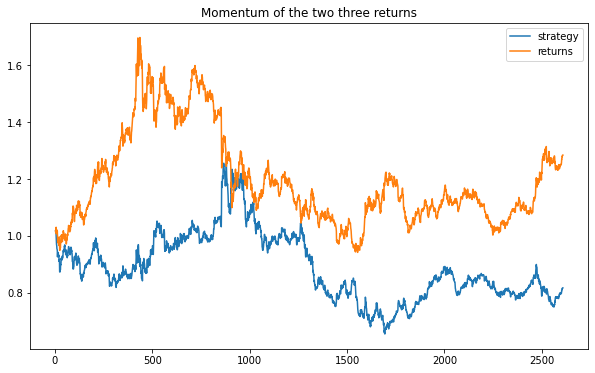

In [51]:
data['position']=np.sign(data['returns'].rolling(2).mean())
data['strategy']=data['position'].shift(1)*data['returns']
data[['strategy','returns']].dropna().cumsum().apply(np.exp).plot(title="Momentum of the two three returns",figsize=(10,6))

In [52]:
data=pd.read_csv('AAPL_1min_05052020.csv',index_col=0,parse_dates=True)

<AxesSubplot:title={'center':'AAPL'}, xlabel='Date'>

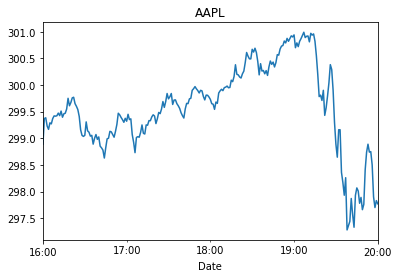

In [55]:
data.CLOSE.plot(title="AAPL")

In [56]:
data['returns']=np.log(data['CLOSE']/data['CLOSE'].shift(1))

In [57]:
to_plot=['returns']

In [59]:
for m in [1,3,5,7,9]:
    data['position_%d' %m]=np.sign(data['returns'].rolling(m).mean())
    data['strategy_%d' %m]=(data['returns']*data['position_%d'%m].shift(1))
    to_plot.append('strategy_%d'%m)

<AxesSubplot:title={'center':'AAPL intraday 05 May 2020'}, xlabel='Date'>

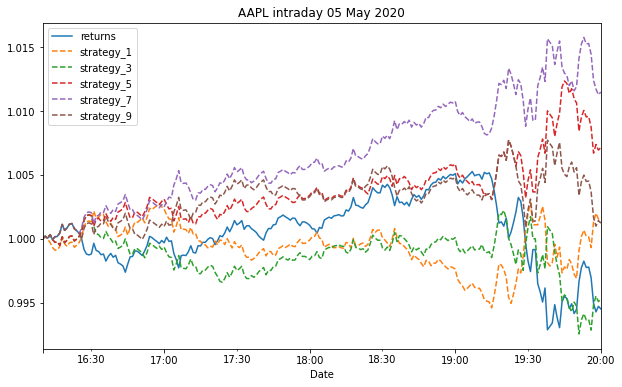

In [62]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(title='AAPL intraday 05 May 2020',figsize=(10, 6), style=['-', '--', '--', '--', '--', '--'])

In [63]:

import MomVectorBacktester as mom

In [64]:
mombt=mom.MomVectorBacktester('XAU=','2010-1-1','2019-12-31',10000,0.0)

In [65]:
mombt.run_strategy(momentum=3)

(20797.87, 7395.53)

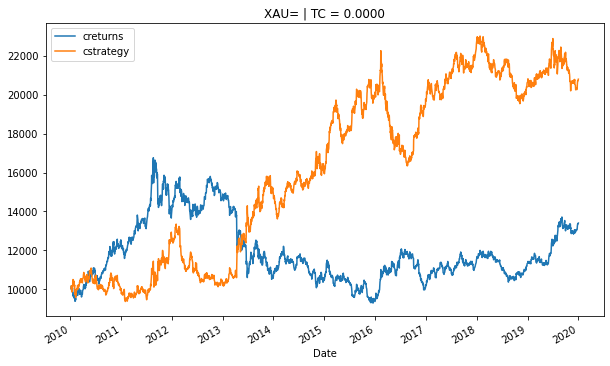

In [66]:
mombt.plot_results()

In [67]:
mombt=mom.MomVectorBacktester('XAU=','2010-1-1','2019-12-31',10000,0.001)

In [68]:
mombt.run_strategy(momentum=3)

(10749.4, -2652.93)

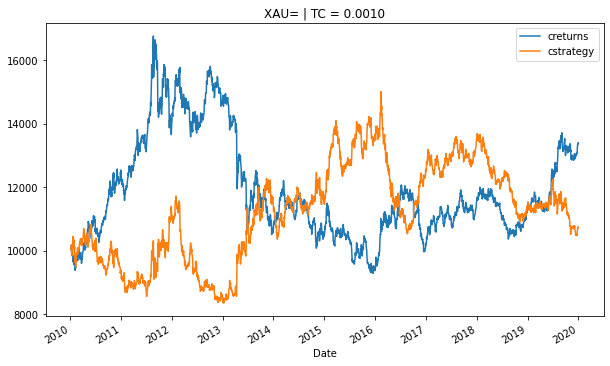

In [69]:
mombt.plot_results()